In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importación de librerias

In [2]:
#importamos recursos necesarios

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from time import process_time

from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from sklearn import metrics
# from sklearn.metrics import recall_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
import graphviz
from sklearn.model_selection import cross_val_score, KFold


##Obtención de datos

In [3]:
data = pd.read_csv("/content/drive/MyDrive/ProyectoSI/heart.csv",sep=';', encoding= "utf-8")
target = data.loc[:,'condicion'].astype(int)
data = data.drop(['condicion'], axis=1)
target.head()

0    0
1    0
2    0
3    1
4    0
Name: condicion, dtype: int64

In [4]:
#mostramos que tipo de dato es cada variable
data.dtypes

age            int64
sexo           int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
depresion    float64
slope          int64
ca             int64
thalio         int64
dtype: object

##Establecimiento del entrenamiento

In [5]:
X = data.values
y = target

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()

X_entrenamiento = scaler.fit_transform(X_entrenamiento)
X_prueba = scaler.transform(X_prueba)

#Estructuración de la red neuronal

In [7]:
modelo = tf.keras.models.Sequential([
 tf.keras.layers.Dense(64, activation='relu', input_shape=(X_entrenamiento.shape[1],)),
 tf.keras.layers.Dense(64, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


##Iteraciones

In [8]:
modelo.fit(X_entrenamiento, y_entrenamiento, epochs=100, batch_size=32, validation_split=0.01)


Epoch 1/100
8/8 [==============================] - 1s 21ms/step - loss: 0.6925 - accuracy: 0.5598 - val_loss: 0.5979 - val_accuracy: 0.6667
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5499 - accuracy: 0.7778 - val_loss: 0.4914 - val_accuracy: 0.6667
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4683 - accuracy: 0.8034 - val_loss: 0.3954 - val_accuracy: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4117 - accuracy: 0.8376 - val_loss: 0.3459 - val_accuracy: 1.0000
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3709 - accuracy: 0.8590 - val_loss: 0.3134 - val_accuracy: 1.0000
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3441 - accuracy: 0.8675 - val_loss: 0.2874 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8718 - val_loss: 0.2616 - val_accuracy: 1.0000
Epoch 8/100
8/8 [=========

In [9]:
loss, exactitud = modelo.evaluate(X_prueba, y_prueba)
print(f'prueba: {exactitud:.2f}')

2/2 [==============================] - 0s 5ms/step - loss: 1.4008 - accuracy: 0.7333
prueba: 0.73


##Predicciones

In [10]:
prediciones = modelo.predict(X_prueba)
etiquetas_prediciones = (prediciones > 0.5).astype(int)

2/2 [==============================] - 0s 2ms/step


##Correlaciones entre datos

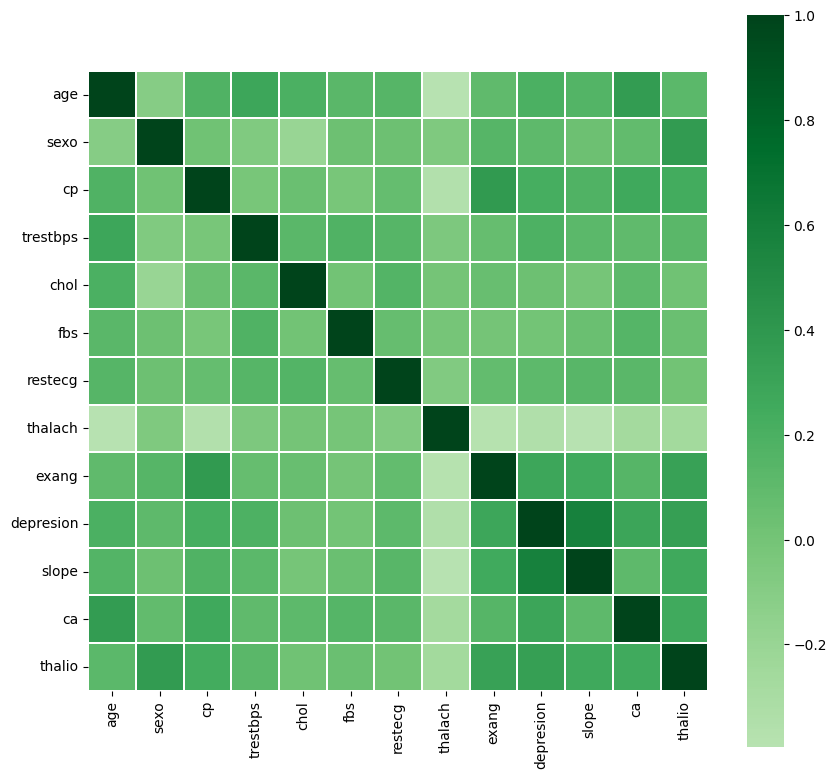

In [11]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="Greens",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95 }
                )
    plt.show();

correlation_heatmap(data[np.array(data.columns)])

##Resultados del modelo aplicado

In [12]:
new_data = pd.read_csv("/content/drive/MyDrive/ProyectoSI/heart.csv",sep=';', encoding= "utf-8")

mejora = new_data.drop('condicion', axis=1).values
mejora_escalable = scaler.transform(mejora)

# Realiza predicciones en el nuevo conjunto de datos
predecir = modelo.predict(mejora_escalable)
modelo_de_predicion= (predecir > 0.9).astype(int)

# esto realiza la Combinacion para las predicciones con los datos originales para su análisis
prediciones2 = new_data.copy()
prediciones2['modelo_de_predicion'] = modelo_de_predicion

# Imprime los resultados
print(prediciones2)

10/10 [==============================] - 0s 1ms/step
     age  sexo  cp  trestbps  chol  fbs  restecg  thalach  exang  depresion  \
0     69     1   3       160   234    1        2      131      0        0.1   
1     69     0   3       140   239    0        0      151      0        1.8   
2     66     0   0       150   226    0        0      114      0        2.6   
3     65     1   0       138   282    1        2      174      0        1.4   
4     64     1   3       110   211    0        2      144      1        1.8   
..   ...   ...  ..       ...   ...  ...      ...      ...    ...        ...   
292   40     1   3       152   223    0        0      181      0        0.0   
293   39     1   3       118   219    0        0      140      0        1.2   
294   35     1   3       120   198    0        0      130      1        1.6   
295   35     0   3       138   183    0        0      182      0        1.4   
296   35     1   3       126   282    0        2      156      1        0.0   

##Exportación de los resultados obtenidos en el modelo de aprendizaje


In [13]:
import pandas as pd

# Suponiendo que 'prediciones2' ya está definido con las columnas necesarias

# Definir la ruta del archivo Excel
resultado = '/content/drive/MyDrive/ProyectoSI/resultadoprueba11.xlsx'

# Exportar todas las columnas de prediciones2 a un archivo Excel
prediciones2.to_excel(resultado, index=False)
print(f"Resultados exportados a {resultado}")

Resultados exportados a /content/drive/MyDrive/ProyectoSI/resultadoprueba11.xlsx


## Aca se aplica el algoritmo xgboost para su comparación


In [14]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Obtención de datos
archivo_csv = '/content/drive/MyDrive/ProyectoSI/heart.csv'
datos = pd.read_csv(archivo_csv)

#se toma de preparar los datos en la parte superior de esta red
X = data.values
y = target

In [15]:
modelo_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42, learning_rate=0.1,
                max_depth=5, alpha=10, n_estimators=100)

In [16]:
# Entrenar
modelo_xgb.fit(X_entrenamiento, y_entrenamiento)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
# Realizar predicciones
predicciones = modelo_xgb.predict(X_prueba)

# Calcular la precisión
precision = accuracy_score(y_prueba, predicciones)
print(f"Precisión del modelo: {precision}")


Precisión del modelo: 0.7
